<a href="https://colab.research.google.com/github/kslim1025/TF_Keras_RNN/blob/master/RNN_Sentiment_Analysis_Tokenizer_Trainning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

텍스트의 길이 : 2318260 characters
텍스트의 길이 : 2318260 characters

id	document	label
6270596	굳 ㅋ	1
9274899	GDNTOPCLASSINTHECLUB	0
8544678	뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아	0
6825595	지루하지는 않은데 완전 막장임... 돈주고 보기에는....	0
6723715	3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??	0
7898805	음악이 주가 된, 최고의 음악영화	1
6315043	진정한 쓰레기	0
6097171	마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터
(50000, 1) (50000, 1)
[[1]
 [0]
 [0]
 [0]
 [0]]
['굳', '']
['gdntopclassintheclub']
['뭐야', '이', '평점들은', '나쁘진', '않지만', '10점', '짜리는', '더더욱', '아니잖아']
['지루하지는', '않은데', '완전', '막장임', '돈주고', '보기에는', '']
['3d만', '아니었어도', '별', '다섯', '개', '줬을텐데', '왜', '3d로', '나와서', '제', '심기를', '불편하게', '하죠', '\\', '\\?', '\\', '\\?', '']


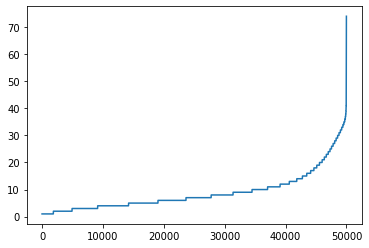

50000
['굳', '']
['gdnto']
['뭐야', '이', '평점들은', '나쁘진', '않지만', '10점', '짜리는', '더더욱', '아니잖아']
['지루하지는', '않은데', '완전', '막장임', '돈주고', '보기에는', '']
['3d만', '아니었어도', '별', '다섯', '개', '줬을텐데', '왜', '3d로', '나와서', '제', '심기를', '불편하게', '하죠', '\\', '\\?', '\\', '\\?', '']
[[  464     1     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [30038     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  299     9 17373  5680  1133    80 17374  6579  1487     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 9430  1928    37 17375   581  1621     1     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [17376  7707   111  7708   289 17377    11  2246   379   565 30039  5681
   9431     4     5     4     5     1     0 

InvalidArgumentError: ignored

In [19]:
# MNIST 문자열 분석으로 유명한 데이터셋이 패션에 관한 데이터 세트를 만듬 그게 FashionMINIST 데이터셋이다.
# 데이터 이미지가 0에서 255까지 값을 가지는 28x28이미지라는 것을 확인가능
# 정답이 되는 라벨을 확인하기 위해 print를 붙여서  확인
# 외부 데이터를 이용한 정제과정
# ctrl+enter를 사용한 런타임가능
# !nvidia-smi : 어떤 GPU를 사용하는지 확인가능한 명령어 
#

try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

# 넘파이는 수학과 과학 연산에 특화된 파이썬 모듈로 딥러닝에서도 유용하게 사용된다.

import numpy as np;
import tensorflow as tf;
import pandas as pd;
import matplotlib.pyplot as plt;
import math;
################################################################################
!nvidia-smi
       
#+-----------------------------------------------------------------------------+
#| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
#|-------------------------------+----------------------+----------------------+
#| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
#| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
#|                               |                      |               MIG M. |
#|===============================+======================+======================|
#|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
#| N/A   51C    P0    35W / 250W |   1581MiB / 16280MiB |      0%      Default |
#|                               |                      |                 ERR! |
#+-------------------------------+----------------------+----------------------+
#                                                                               
#+-----------------------------------------------------------------------------+
#| Processes:                                                                  |
#|  GPU   GI   CI        PID   Type   Process name                  GPU Memory |
#|        ID   ID                                                   Usage      |
#|=============================================================================|
#|  No running processes found                                                 |
#+-----------------------------------------------------------------------------+

################################################################################

# 긍정, 부정 감성 분석
# 감성분석은 입력된 자연어 안의 주관적의견, 감정 등을 찾아낸다.
# 이 가운데 극성(polarity) 감성 분석은 문장의 궁정/부정이나 긍정/중립/부정으로 분류합니다.
# 영화 리뷰이나 음식점 리뷰는 데이터의 양이 많고 별점을 함꼐 달기 때문에 긍정/중립/부정 라벨링이 쉬워서 극성 감성 분석에 쉽게 적용할 수 있습니다.

# 1. 데이터 세트를 불러오기
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_train_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

# 2. 데이터 메모리 불러오기
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')

#텍스트가 총 몇자인지 확인
print('텍스트의 길이 : {} characters'.format(len(train_text)))
print('텍스트의 길이 : {} characters'.format(len(test_text)))
print()

#처음 300자를 확인해봅니다.
print(train_text[:300])

train_Y =  np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0 ])
test_Y =  np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0 ])

print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

import re 
# from https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py

def clean_str(string):
  string = re.sub(r"[^가-힣A-Za-z0-9(),!?'\']"," ",string)
  string = re.sub(r"\'s", "\'s", string)
  string = re.sub(r"\'ve","\'ve",string)
  string = re.sub(r"n\'t", "n\'t",string)
  string = re.sub(r"\'re","\'re",string)
  string = re.sub(r"\'d","\'d",string)
  string = re.sub(r"\'ll","\'ll",string)
  string = re.sub(r",",",",string)
  string = re.sub(r"!"," ! ",string)
  string = re.sub(r"\(", " \( ",string)
  string = re.sub(r"\)", " \) ",string)
  string = re.sub(r"\?", " \? ",string)
  string = re.sub(r"\?", " \? ",string)
  string = re.sub(r"\s{2,}"," ",string)
  string = re.sub(r"\s{2,}","\'",string)
  string = re.sub(r"\'","",string)
  
  return string.lower()

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]

# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
  print(sentences[i])

sentence_len = [len(sentence) for  sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

# 25 단어 이하인 문장수는 142.587개로 전체의 95%정도로 확인
print(sum([int(1<=25) for l in sentence_len]))

#단어 정제 및 문장 길이를 줄이는 작업
sentences_new = []
for sentence in sentences:
  sentences_new.append([word[:5] for word in sentence][:25])

sentences = sentences_new

for i in range(5):
  print(sentences[i])

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=200000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

#Tokenizer의 동작확인
# tokenizer.index_word[19999]과 tokenizer.index_word[20000]번째 있는 단어를 확인해본뒤 이단어들로 구성된 문장을  Tokenizer안에 넣어줌
print(tokenizer.index_word[19999])
print(tokenizer.index_word[20000])

temp = tokenizer.texts_to_sequences(['#$#$','경우는','잊혀질','연기가'])

print(temp)
temp = pad_sequences(temp, padding='post')
print(temp)

#감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
                            tf.keras.layers.Embedding(20000, 300, input_length=25),
                            tf.keras.layers.LSTM(units=50),
                            tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

#감성 분석 모델 학습
#history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

#감성 분석 모델의 학습 결과 확인
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.histpry['val_loss'],'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.histpry['val_accuracy'],'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences =[sentence.split(' ') for sentence in test_text_X]
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentence)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

test_sentence = '딥러닝으로 임베디드 레이어 테스트'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
  now_sentence.append(word)
  test_sentences.append(now_sentence[:])

  test_X_1 = tokenizer.texts_to_sequences(test_sentences)
  test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
  prediction = model.predict(test_X_1)
  for idx, sentence in enmerate(test_senteces):
    print(sentence)
    print(prediction[idx])

